In [1]:
# Import dependencies
import numpy as np
import omnipose

# set up plotting defaults
from omnipose.plot import imshow
omnipose.plot.setup()

# This checks to see if you have set up your GPU properly.
# CPU performance is a lot slower, but not a problem if you 
# are only processing a few images.
from omnipose.gpu import use_gpu
use_GPU = use_gpu()

# for plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.dpi'] = 300
plt.style.use('dark_background')
%matplotlib inline


2025-05-28 15:15:21,781	[INFO]     omnipose/gpu.py               <module>....()	 line  12	On ARM, OMP_NUM_THREADS set to CPU core count = 1, PARLAY_NUM_THREADS set to 1.


Total frames: 37


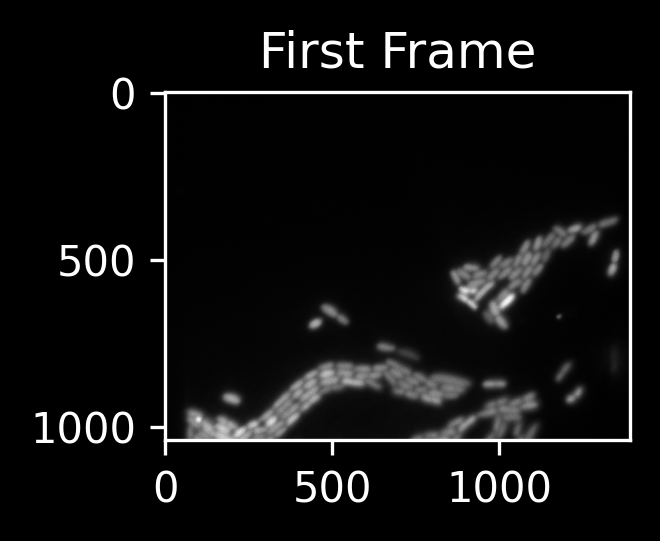

In [2]:

nd2_file = '/Users/hiram/Documents/EVERYTHING/20-29 Research/22 OliveiraLab/22.12 ND2 analyzer/nd2-analyzer/SR_1_5_2h_Pre-C_3h_IPTG_After10h_05_MC.nd2'
import nd2

# Load the ND2 file (without closing it immediately)
with nd2.ND2File(nd2_file) as reader:
    images = reader.to_dask(nd2_file)
    test_img = images[0, 0, 2].compute()

# Check the total number of frames
print(f"Total frames: {len(images)}")

# Display the first frame
plt.imshow(test_img, cmap="gray")
plt.title("First Frame")
plt.show()

In [3]:
import cellpose_omni
from cellpose_omni import models
from cellpose_omni.models import MODEL_NAMES

model_name = 'bact_phase_omni'
model = models.CellposeModel(gpu=use_GPU, model_type=model_name)

2025-05-28 15:15:27,199	[INFO]     cellpose_omni/models.py       __init__....()	 line 436	>>bact_phase_omni<< model set to be used
2025-05-28 15:15:27,200	[INFO]     cellpose_omni/core.py         assi...evice()	 line  67	Using GPU.
2025-05-28 15:15:27,290	[INFO]                                   __init__....()	 line 173	u-net config: ([2, 32, 64, 128, 256], 4, 2)


In [4]:
import time
chans = [0,0] #this means segment based on first channel, no second channel 

# n = [-1] # make a list of integers to select which images you want to segment
# n = range(nimg) # or just segment them all 
n = [0]

# define parameters
params = {'channels':chans, # always define this with the model
          'rescale': None, # upscale or downscale your images, None = no rescaling 
          'mask_threshold': -2, # erode or dilate masks with higher or lower values between -5 and 5 
          'flow_threshold': 0, # default is .4, but only needed if there are spurious masks to clean up; slows down output
          'transparency': True, # transparency in flow output
          'omni': True, # we can turn off Omnipose mask reconstruction, not advised 
          'cluster': True, # use DBSCAN clustering
          'resample': True, # whether or not to run dynamics on rescaled grid or original grid 
          'verbose': False, # turn on if you want to see more output 
          'tile': False, # average the outputs from flipped (augmented) images; slower, usually not needed 
          'niter': None, # default None lets Omnipose calculate # of Euler iterations (usually <20) but you can tune it for over/under segmentation 
          'augment': False, # Can optionally rotate the image and average network outputs, usually not needed 
          # 'affinity_seg': True, # new feature, stay tuned...
         }

imgs = [test_img]

tic = time.time() 
masks, flows, styles = model.eval([imgs[i] for i in n],**params)

net_time = time.time() - tic

print('total segmentation time: {}s'.format(net_time))

total segmentation time: 2.0263099670410156s


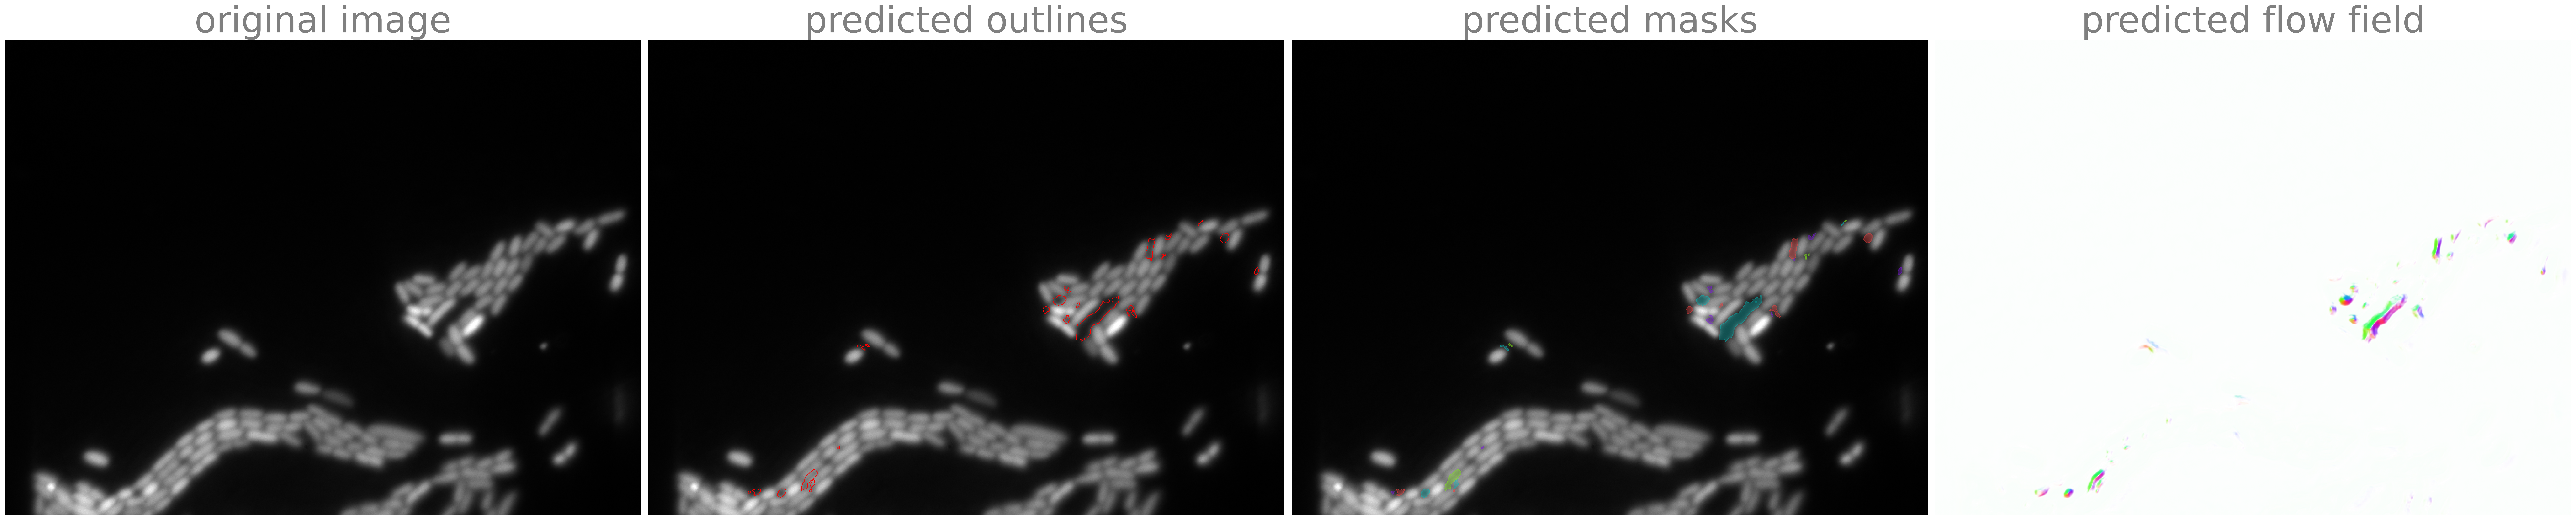

In [5]:
from cellpose_omni import plot
import omnipose

for idx,i in enumerate(n):

    maski = masks[idx] # get masks
    bdi = flows[idx][-1] # get boundaries
    flowi = flows[idx][0] # get RGB flows 

    # set up the output figure to better match the resolution of the images 
    f = 15
    szX = maski.shape[-1]/mpl.rcParams['figure.dpi']*f
    szY = maski.shape[-2]/mpl.rcParams['figure.dpi']*f
    fig = plt.figure(figsize=(szY,szX*4), facecolor=[0]*4, frameon=False)
    
    plot.show_segmentation(fig, omnipose.utils.normalize99(imgs[i]), 
                           maski, flowi, bdi, channels=chans, omni=True,
                           interpolation=None)

    plt.tight_layout()
    plt.show()

# Let's try doing it multichannel!

In [ ]:
from cellpose_omni import plot
import omnipose

for idx,i in enumerate(n):

    maski = masks[idx] # get masks
    bdi = flows[idx][-1] # get boundaries
    flowi = flows[idx][0] # get RGB flows 

    # set up the output figure to better match the resolution of the images 
    f = 15
    szX = maski.shape[-1]/mpl.rcParams['figure.dpi']*f
    szY = maski.shape[-2]/mpl.rcParams['figure.dpi']*f
    fig = plt.figure(figsize=(szY,szX*4), facecolor=[0]*4, frameon=False)
    
    plot.show_segmentation(fig, omnipose.utils.normalize99(imgs[i]), 
                           maski, flowi, bdi, channels=chans, omni=True,
                           interpolation=None)

    plt.tight_layout()
    plt.show()